<a href="https://colab.research.google.com/github/varunreddy1268/spark_foundation/blob/main/4_2project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [223]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.ticker as tick

In [224]:
df=pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [225]:
#exp_data used for data exploration
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [226]:
col=df.columns

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [228]:
df=df.drop(columns=['customerID'])

In [229]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [230]:
df['TotalCharges'].value_counts()
df['TotalCharges'].replace(to_replace=" ",value=0,inplace=True)

In [231]:
df['TotalCharges']=df['TotalCharges'].astype(str).astype(float)
exp_data=df

In [232]:
df['Churn'].replace(to_replace="Yes",value=1,inplace=True)
df['Churn'].value_counts()

No    5174
1     1869
Name: Churn, dtype: int64

In [233]:
df['Churn'].replace(to_replace="No",value=0,inplace=True)

In [234]:
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

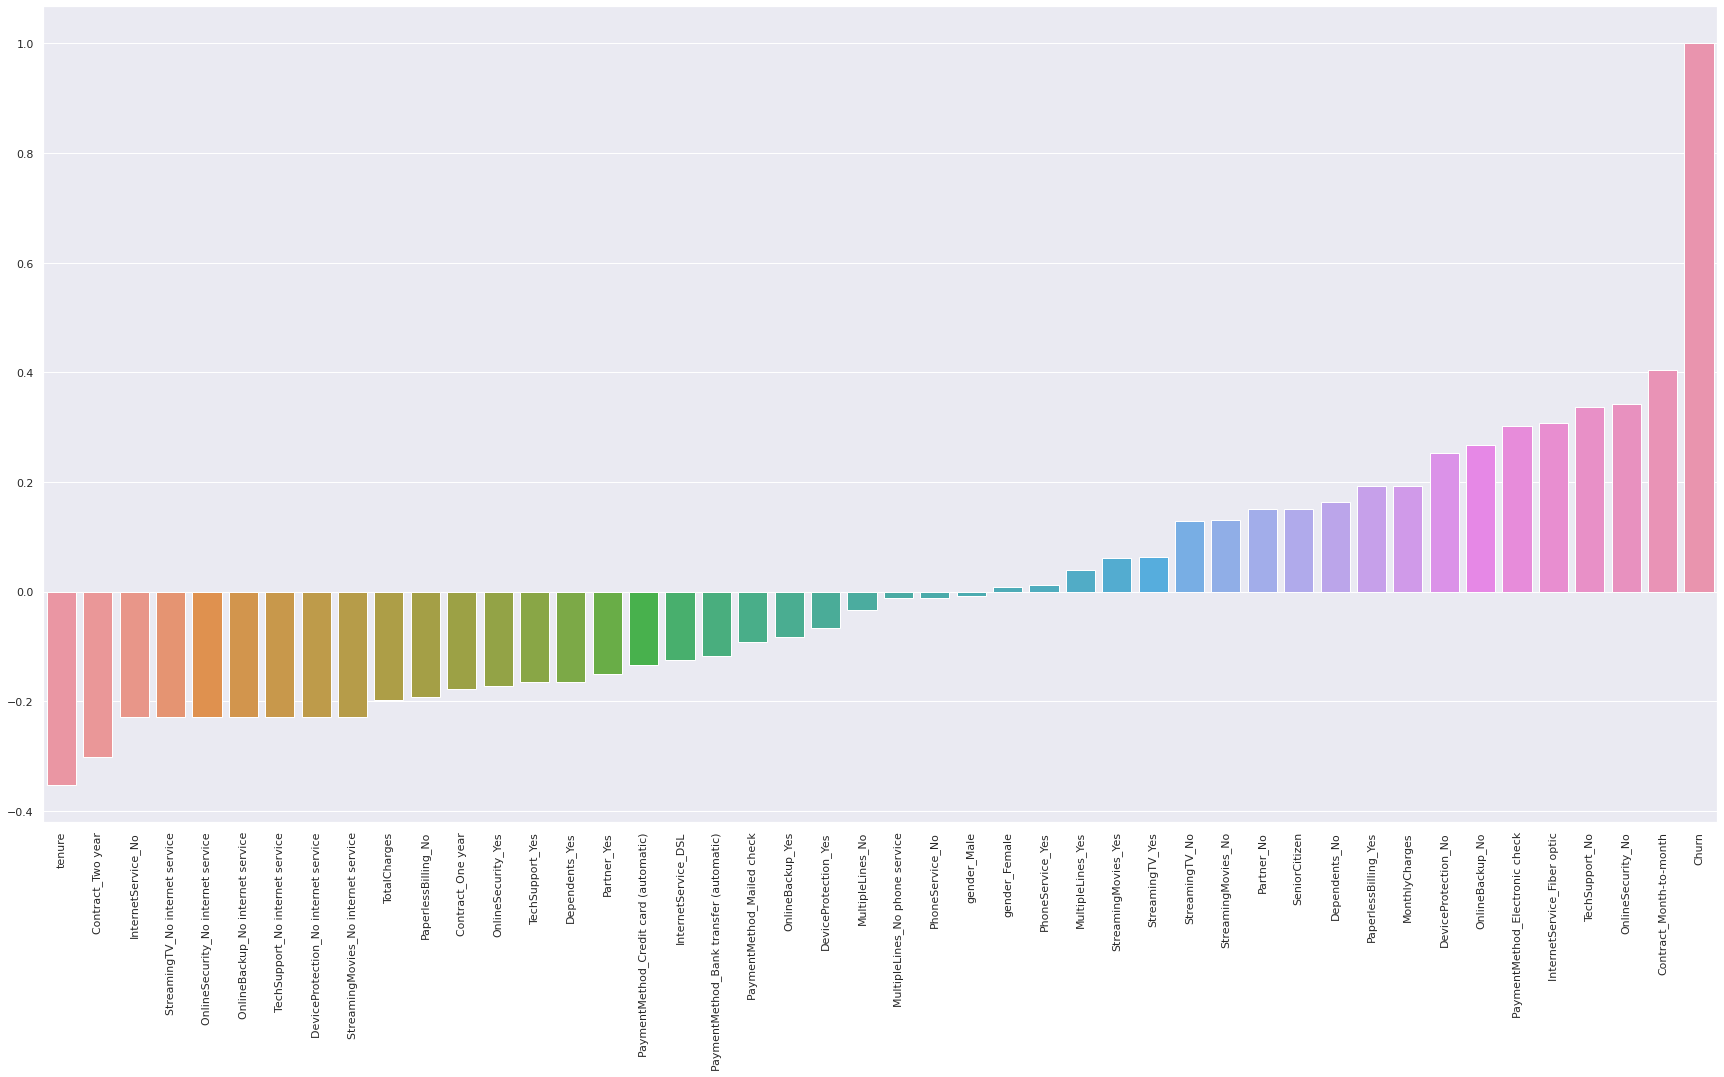

In [235]:
plt.figure(figsize=[30,15])
plt.xticks(rotation=90)
sns.barplot(x=df1.corr()['Churn'].sort_values().index,y=df1.corr()['Churn'].sort_values().values)

In [236]:
df1=pd.get_dummies(df)
exp_dumm=df1

In [237]:
cols=df1.corr()['Churn'].sort_values()
#These columns are important columns for determinig the target values.
l=cols[(cols>0.25) | (cols<-0.25)].index.tolist()

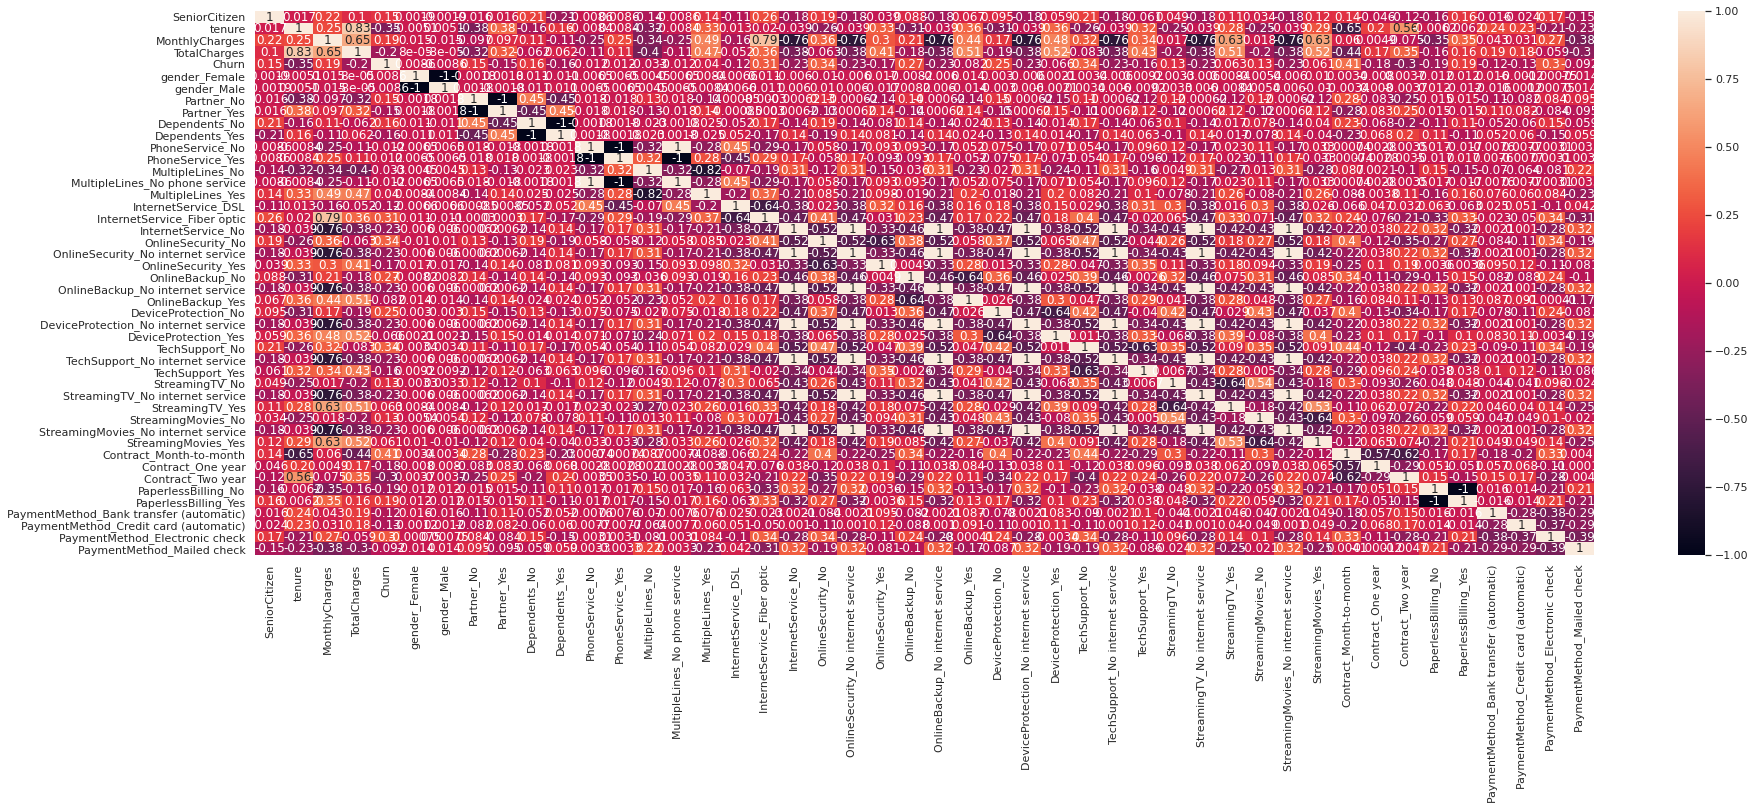

In [238]:
plt.figure(figsize=[30,10])
sns.heatmap(df1.corr(),annot=True)

In [239]:
l

['tenure',
 'Contract_Two year',
 'DeviceProtection_No',
 'OnlineBackup_No',
 'PaymentMethod_Electronic check',
 'InternetService_Fiber optic',
 'TechSupport_No',
 'OnlineSecurity_No',
 'Contract_Month-to-month',
 'Churn']

In [240]:
c=df1[['tenure',
 'Contract_Two year',
 'DeviceProtection_No',
 'OnlineBackup_No',
 'PaymentMethod_Electronic check',
 'InternetService_Fiber optic',
 'TechSupport_No',
 'OnlineSecurity_No',
 'Contract_Month-to-month',
 'Churn']]

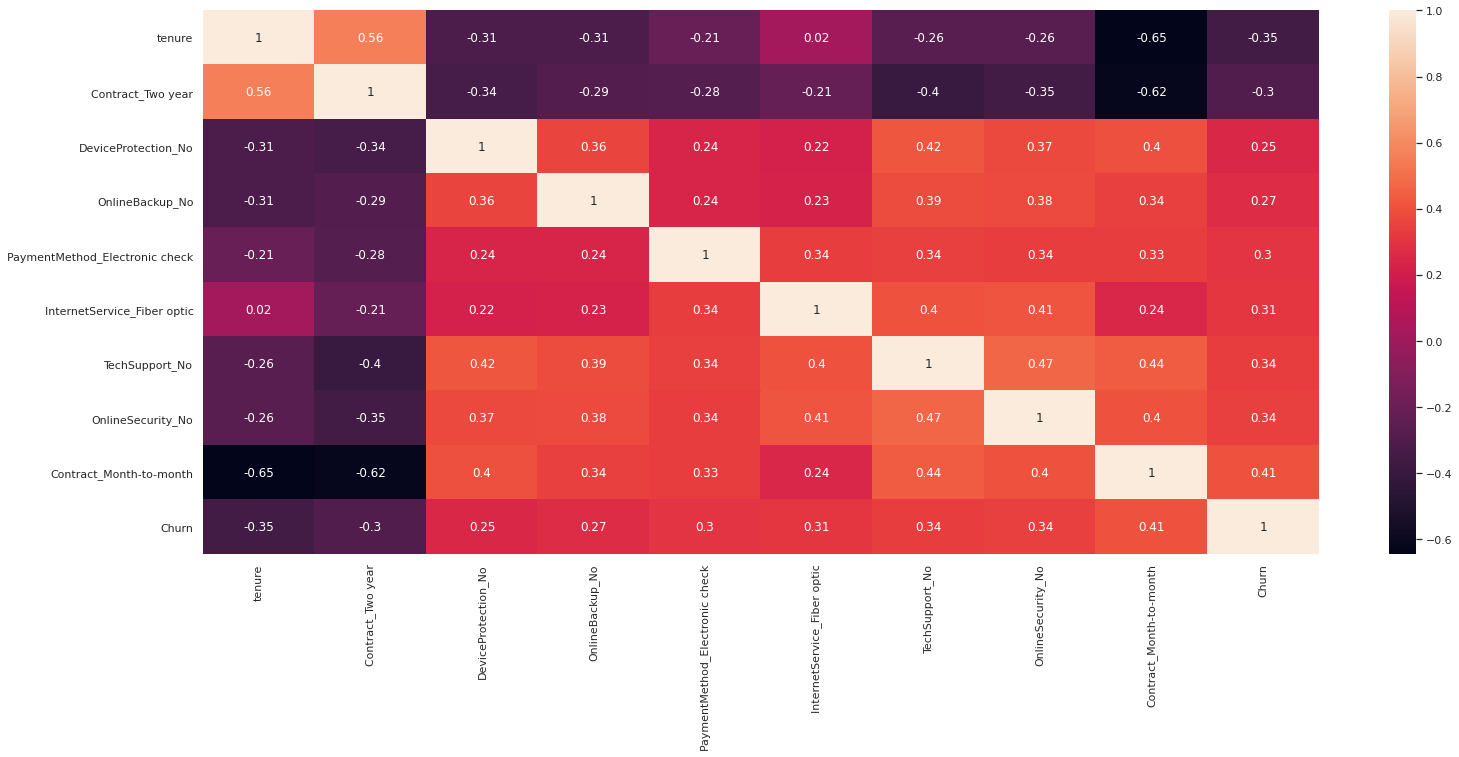

In [241]:
#few important columns coorealtion with target
sns.heatmap(c.corr(),annot=True)

**Data** **Exploration**

---
To understand better about the dataset we are working on letus plot some data plots to have better understanding about data in a simple way.


1. **Gender** vs **Churn**:-

---
We will explore how gender of a customer is defining the target variable.How the correlation between them is defined according to the data set.


[0, 0, 0, 0]


<Figure size 1080x576 with 0 Axes>

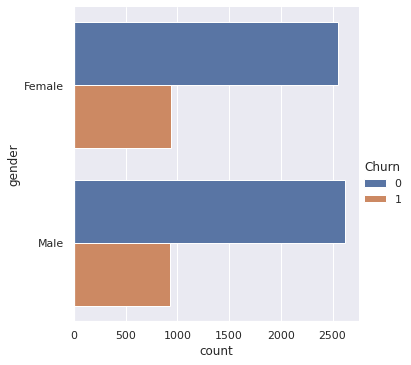

In [242]:
c1=exp_data[(exp_data['gender']=="Male") & (exp_data['Churn']=='Yes')]
c2=exp_data[(exp_data['gender']=="Male") & (exp_data['Churn']=='No')]
c3=exp_data[(exp_data['gender']=="Female") & (exp_data['Churn']=='Yes')]
c4=exp_data[(exp_data['gender']=="Female") & (exp_data['Churn']=='No')]
l=[len(c1),len(c2),len(c3),len(c4)]
plt.figure(figsize=(15,8))
sns.catplot(y="gender",hue="Churn",kind="count",data=exp_data)
print(l)

**Tenure vs Churn**

---


Tenure is one of the most coorelated Feature with Churn.

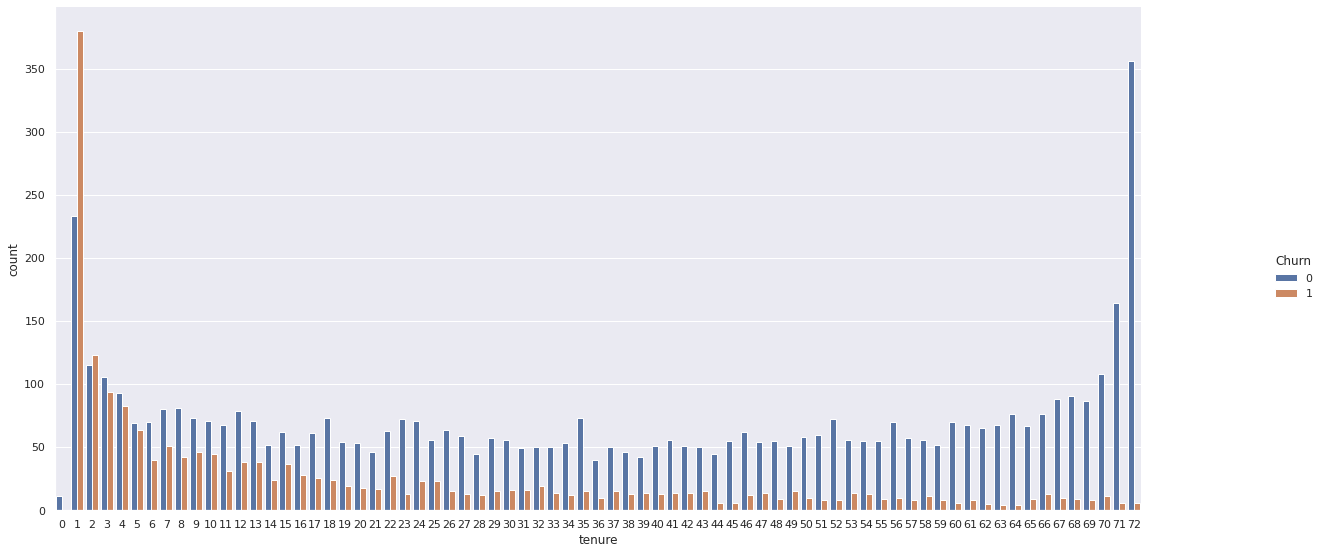

In [243]:
sns.set(rc={'figure.figsize':(25,10)})
ax=sns.catplot(x="tenure",hue="Churn",kind="count",data=exp_data,orient="h")
ax.fig.set_figwidth(20)
ax.fig.set_figheight(8)

**3 . Contract Based Churn Change**

---
contract



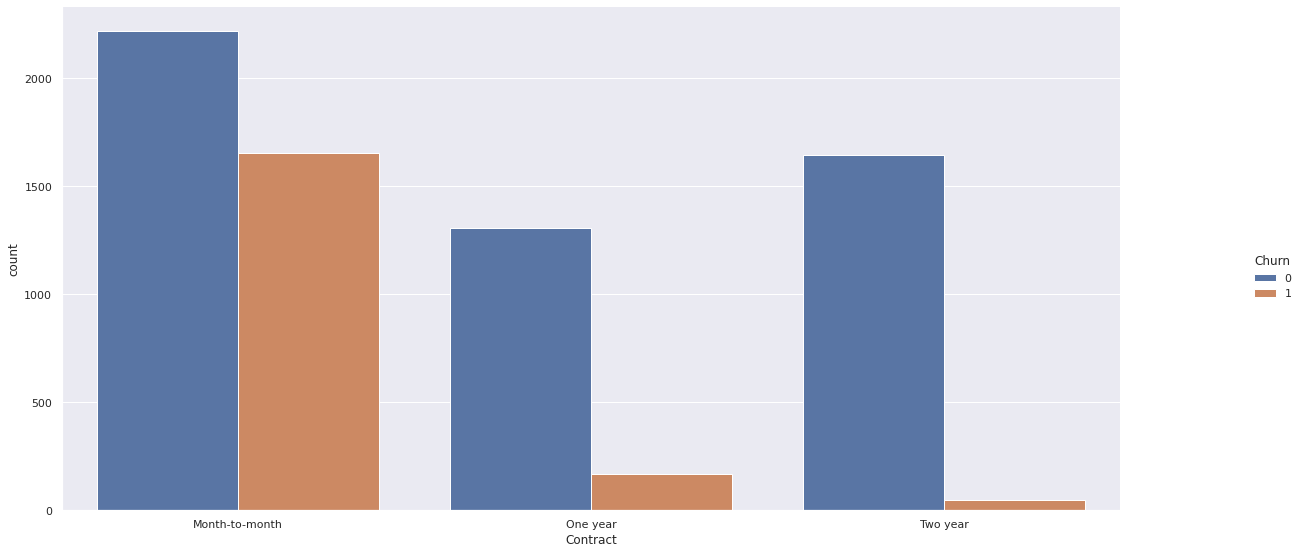

In [244]:
ax=sns.catplot(x="Contract",hue="Churn",kind="count",data=exp_data)
ax.fig.set_figwidth(20)
ax.fig.set_figheight(8)

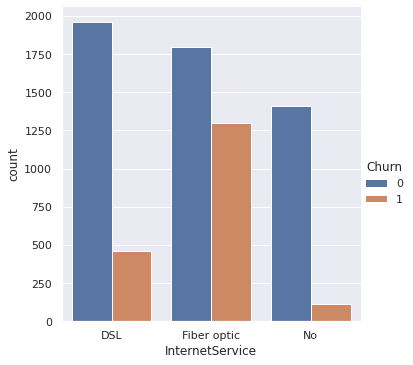

In [245]:
sns.catplot(x="InternetService",hue="Churn",kind="count",data=exp_data)

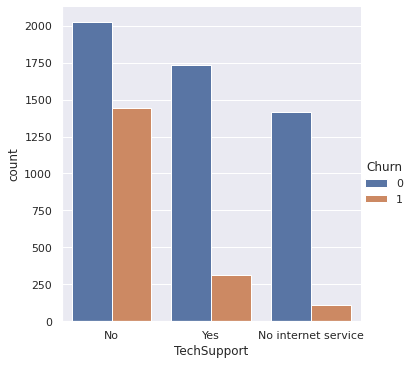

In [246]:
sns.catplot(x="TechSupport",hue="Churn",kind="count",data=exp_data)

In [247]:
exp_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


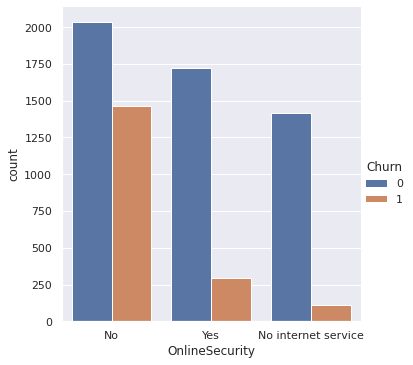

In [248]:
sns.catplot(x="OnlineSecurity",hue="Churn",kind="count",data=exp_data)

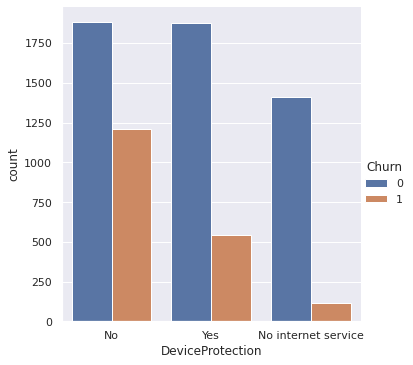

In [249]:
sns.catplot(x="DeviceProtection",hue="Churn",kind="count",data=exp_data)

In [268]:
#Lest keep a data_table to store accuracy scores of every model
acc=pd.DataFrame(columns=['Model_name','Accuracy_score'])

**Model Preperation**

---



---



In [251]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [252]:
y=df1['Churn'].values
X=df1.drop(columns=['Churn'])
dp_fe=X.columns
m_scale=MinMaxScaler(feature_range=(0,1))
m_scale.fit(X)
X=pd.DataFrame(m_scale.transform(X))
X.columns=dp_fe


In [324]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [325]:
X_train

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
240,0.0,1.000000,0.680100,0.731220,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
850,0.0,1.000000,0.970647,0.976016,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2128,0.0,0.569444,0.560199,0.348143,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
596,0.0,0.222222,0.364179,0.105489,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
206,0.0,1.000000,0.370149,0.481209,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,0.0,0.902778,0.021393,0.162865,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
5695,0.0,1.000000,0.618905,0.660648,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1361,0.0,0.055556,0.599005,0.038003,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1547,0.0,0.875000,0.888060,0.791469,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [326]:
X_test

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1093,0.0,0.986111,0.817910,0.824394,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
646,0.0,0.013889,0.273134,0.005262,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
710,0.0,0.013889,0.012935,0.002251,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3638,1.0,0.027778,0.317413,0.013253,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5481,1.0,0.013889,0.551244,0.008480,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4785,0.0,0.250000,0.620896,0.167177,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
353,0.0,0.055556,0.662189,0.042822,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
914,0.0,1.000000,0.069154,0.207132,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
4708,0.0,0.777778,0.428358,0.385363,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


1.**logistic Regression**

---



---



In [327]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
lr_model.fit(X_train,y_train)
y_pred=lr_model.predict(X_test)
from sklearn import metrics
print(metrics.accuracy_score(y_pred,y_test))
acc1=pd.DataFrame({"Model_name":"Logistic Regression","Accuracy_score":0.801277501774308},index=[0])

0.801277501774308


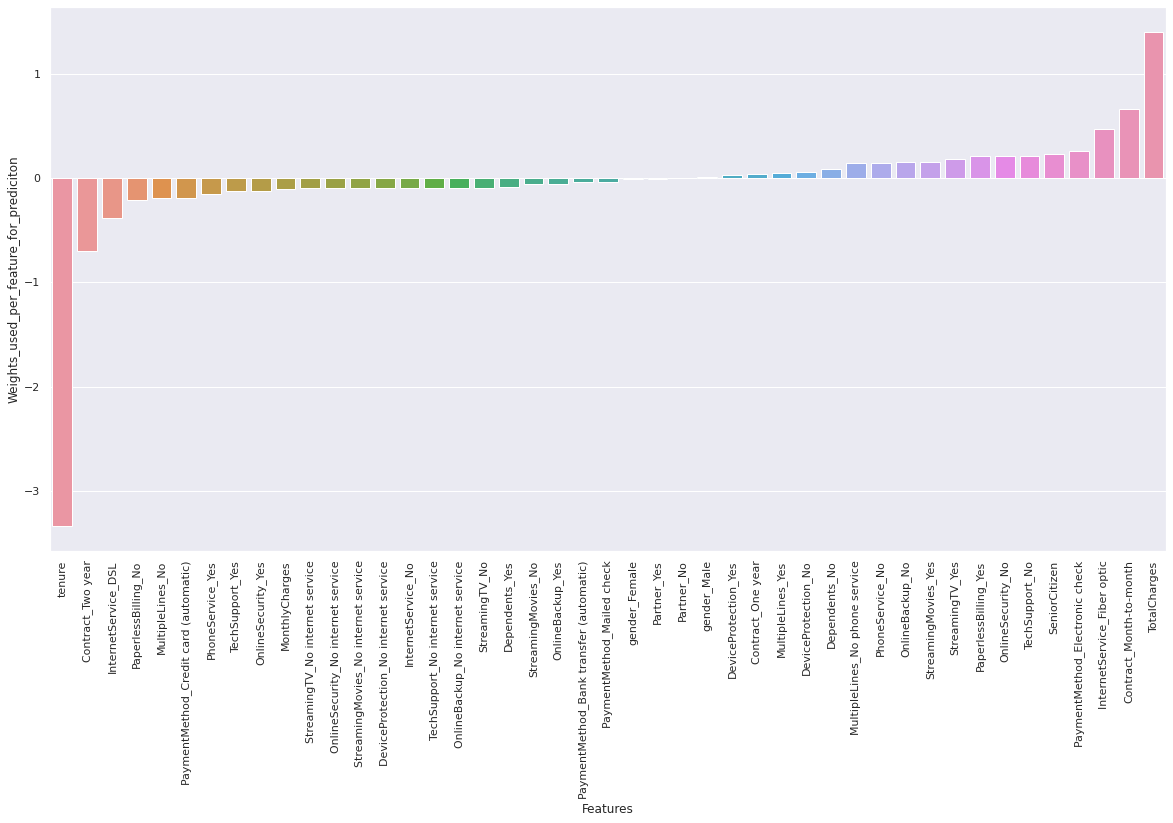

In [328]:
#Finding Weights used in the model for predictions are
w=lr_model.coef_[0].tolist()
coef=pd.DataFrame()
coef["Features"]=dp_fe
coef["Weights_used_per_feature_for_prediciton"]=w
coef=coef.sort_values(by="Weights_used_per_feature_for_prediciton")
plt.figure(figsize=[20,10])
plt.xticks(rotation=90)
sns.barplot(x=coef["Features"],y=coef['Weights_used_per_feature_for_prediciton'])

2.**KNearestNeighbors**

---



---



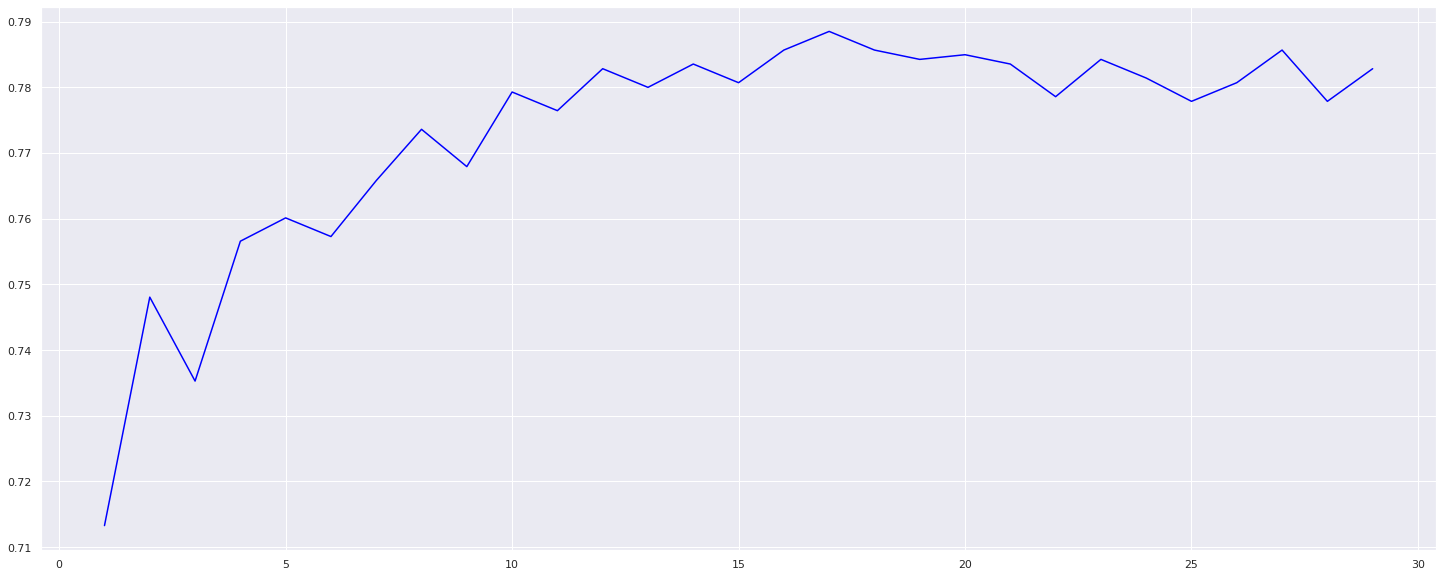

In [329]:
from sklearn.neighbors import KNeighborsClassifier
#let us see the inertia(Inertia is the sum of squared error for each cluster the smaller the inertia the denser the cluster)
res=[]
for i in range(1,30):
  knn=KNeighborsClassifier(n_neighbors=i)
  #select n value as  since that is the point the graph took as a constaant flow.k=6
  knn.fit(X_train,y_train)
  y_pred=knn.predict(X_test)
  from sklearn import metrics
  acc_score=metrics.accuracy_score(y_pred,y_test)
  res.append(acc_score)
sns.lineplot(x=list(range(1,30)),y=res,color="blue")

In [332]:
#since the accuracy score is max at 13 so consider n value as n=13.
knn=KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
acc_score=metrics.accuracy_score(y_pred,y_test)
print(acc_score)
acc2=pd.DataFrame({"Model_name":"KNeighborsClassifier","Accuracy_score":0.7856635911994322},index=[0])

0.7856635911994322


3.**Random Forest Classifier**

---



---



In [334]:
from sklearn.ensemble import RandomForestClassifier
rfs_model=RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,random_state =50, max_features = "auto")
rfs_model.fit(X_train,y_train)
pred=rfs_model.predict(X_test)
from sklearn import metrics
acc_score=metrics.accuracy_score(y_pred,y_test)
print(acc_score)
acc3=pd.DataFrame({"Model_name":"RandomForestClassifier","Accuracy_score":0.7856635911994322},index=[0])

0.7856635911994322


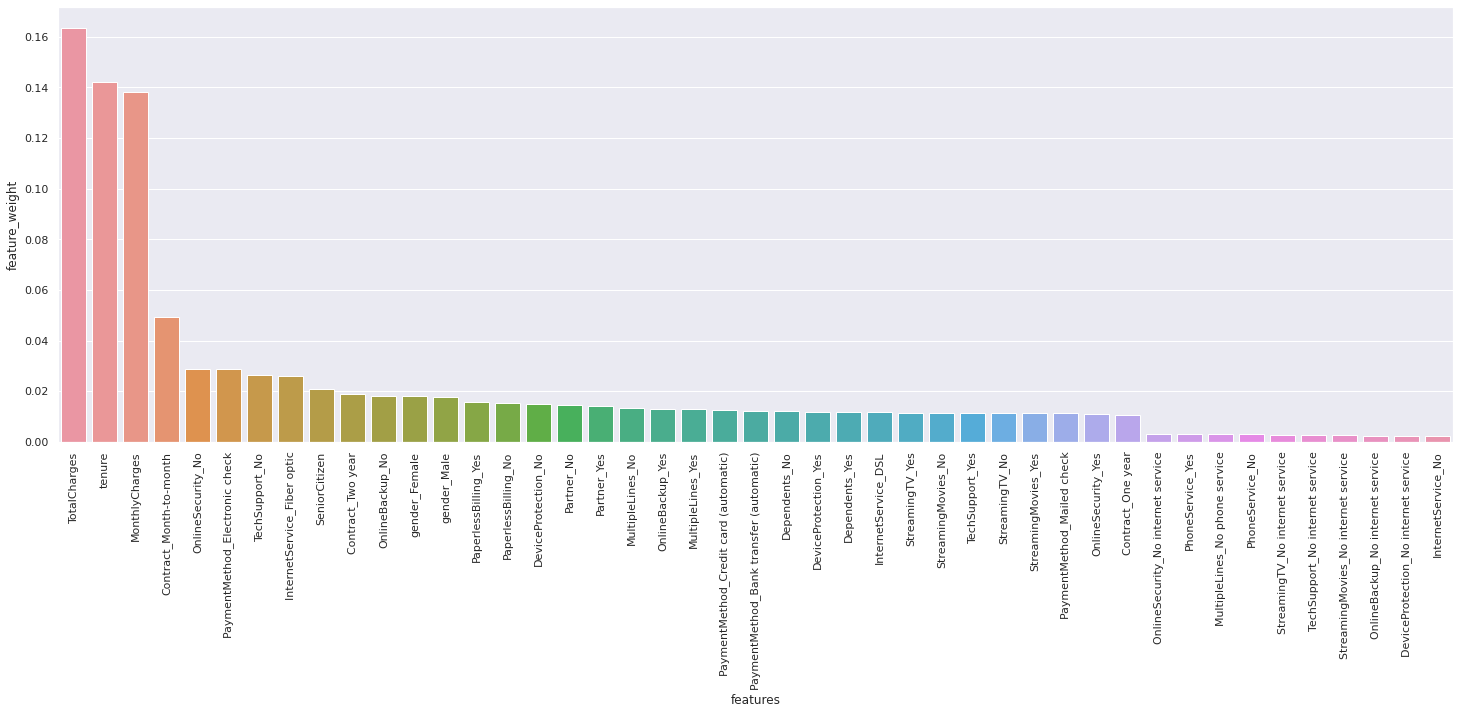

In [336]:
#Now checking the importance of each feature we used in random_forest_model
w_df=pd.DataFrame({"feature_weight":rfs_model.feature_importances_,"features":dp_fe}).sort_values(by="feature_weight",ascending=False)
plt.figure(figsize=(25,8))
plt.xticks(rotation=90)
sns.barplot(x=w_df['features'],y=w_df['feature_weight'])

4.**Naive Bayes Classifier**

---



---



In [298]:
from sklearn.naive_bayes import GaussianNB
model4=GaussianNB()
model4.fit(X_train,y_train)
y_pred=model4.predict(X_test)
from sklearn import metrics
acc_score=metrics.accuracy_score(y_pred,y_test)
print(acc_score)
acc4=pd.DataFrame({"Model_name":"GuassianNB","Accuracy_score":0.7061745919091554},index=[0])

0.7061745919091554


5.**Support Vector Machine**

---



---



In [337]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [340]:
from sklearn.svm import SVC
model5=SVC(kernel="linear")
model5.fit(X_train,y_train)
y_pred=model5.predict(X_test)
from sklearn import metrics
acc_score=metrics.accuracy_score(y_test,y_pred)
print(acc_score)
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  

0.7892122072391767
[[915 108]
 [189 197]]
